# <center><div style="font-family: sans-serif; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">Imports</div></center>

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning supplements
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestRegressor

# Other
import time

# <center><div style="font-family: sans-serif; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">Approach 2 - Adding Census Data to Raw Data & Basic Modelling</div></center>

# Data Manipulation
1. Raw data manipulation
  * Feature Selection
  * Fill in missing values
  * Convert categorical columns to numerical
2. Census data manipulation
  * Feature Selection
  * Fill in missing values
  * Convert categorical columns to numerical
3. Combine Raw data & Census data
4. Split data

**IMPORTANT:** We're going to functionize all the data manipulations on the training set so that we can easily replicate them on the test set later on during submission.

### 1. Raw Data Manipulation

Since we are not really changing the raw data for approach 2 right now, the same data manipulations apply as approach 1.

In [2]:
raw = pd.read_csv('data/train.csv', parse_dates=['first_day_of_month'])

In [3]:
raw.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [4]:
# Separate first_day_of_month
raw['year'] = raw['first_day_of_month'].dt.year
raw['month'] = raw['first_day_of_month'].dt.month

# Remove redundant/not applicable columns
raw.drop(['row_id', 'county', 'state', 'active', 'first_day_of_month'], axis=1, inplace=True)

In [5]:
raw.head()

,cfips,microbusiness_density,year,month
0,1001,3.007682,2019,8
1,1001,2.884870,2019,9
2,1001,3.055843,2019,10
3,1001,2.993233,2019,11
4,1001,2.993233,2019,12


### 2. Census Data Manipulation

In [6]:
census = pd.read_csv('data/census_starter.csv')

In [7]:
census.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

#### Feature Selection

There are a lot of features in the census dataset but there are 5 main categories:
* `pct_bb_[year]` - **relevant**
  * The percentage of households in the county with access to broadband of any type
* `cfips` - **relevant**
  * The CFIPS code for the specific county
* `pct_college_[year]` - **relevant**
  * The percent of the population in the county over age 25 with a 4-year college degree
* `pct_foreign_born_[year]` - **relevant**
  * The percent of the population in the county born outside of the United States
* `pct_it_workers_[year]` - **relevant**
  * The percent of the workforce in the county employed in information related industries
* `median_hh_inc_[year]` - **relevant**
  * The median household income in the county

#### Fill in Missing Values

In [8]:
census.isna().sum()

pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              1
pct_bb_2021              1
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         1
pct_college_2021         1
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    1
pct_foreign_born_2021    1
pct_it_workers_2017      0
pct_it_workers_2018      1
pct_it_workers_2019      0
pct_it_workers_2020      1
pct_it_workers_2021      1
median_hh_inc_2017       0
median_hh_inc_2018       1
median_hh_inc_2019       0
median_hh_inc_2020       2
median_hh_inc_2021       2
dtype: int64

In [9]:
census[census['pct_bb_2020'].isna()].iloc[0]

pct_bb_2017                 80.5
pct_bb_2018                 79.1
pct_bb_2019                 80.4
pct_bb_2020                  NaN
pct_bb_2021                  NaN
cfips                     2261.0
pct_college_2017            23.1
pct_college_2018            19.0
pct_college_2019            16.5
pct_college_2020             NaN
pct_college_2021             NaN
pct_foreign_born_2017        4.9
pct_foreign_born_2018        6.3
pct_foreign_born_2019        6.6
pct_foreign_born_2020        NaN
pct_foreign_born_2021        NaN
pct_it_workers_2017          3.3
pct_it_workers_2018          3.9
pct_it_workers_2019          5.3
pct_it_workers_2020          NaN
pct_it_workers_2021          NaN
median_hh_inc_2017       86019.0
median_hh_inc_2018       82306.0
median_hh_inc_2019       79867.0
median_hh_inc_2020           NaN
median_hh_inc_2021           NaN
Name: 92, dtype: float64

CFIP #2261 has a lot of missing values and they are all from the later years. We may want to remove this CFIP id because its information is outdated and it seems as if the census just lost track of this county.

Let's check if this CFIP id is in the raw dataset. If it is, we will need to use the outdated data. If it isn't, then we don't have to worry about this.

In [10]:
raw[raw['cfips'] == 2261]

,cfips,microbusiness_density,year,month


Since the raw data doesn't have this CFIP id, we don't need to worry about it... so we can remove it from the census data. In fact, we can remove all the CFIP id's that are in the census data but not in the raw dataset.

In [11]:
# Census data has more CFIP id's than the raw dataset
set1 = set(raw['cfips'])
set2 = set(census['cfips'])
diff = list(set2 - set1)
diff

[51690, 31117, 2158, 2261, 46102, 51640, 51580]

In [12]:
# Removing all of the uncommon CFIP id rows from census data
for cfip in diff:
  census.drop(census[census['cfips'] == cfip].index, inplace=True)

# Checking that everything is removed
set2 = set(census['cfips'])
list(set2 - set1)

[]

In [13]:
census.isna().sum()

pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              0
pct_bb_2021              0
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         0
pct_college_2021         0
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    0
pct_foreign_born_2021    0
pct_it_workers_2017      0
pct_it_workers_2018      1
pct_it_workers_2019      0
pct_it_workers_2020      0
pct_it_workers_2021      0
median_hh_inc_2017       0
median_hh_inc_2018       1
median_hh_inc_2019       0
median_hh_inc_2020       1
median_hh_inc_2021       1
dtype: int64

Let's find the other CFIP id(s) that still have missing values. Since they are still in the census data, they must also be in the raw data. 

We cannot remove this data because we need to provide predictions for every single CFIP id in the raw dataset (because the test dataset has the exact same CFIP id's). Thus, we must use imputation.

In terms of imputation, we shouldn't we using any data that came out after the year of the missing value bceause that would reduce our model's ability to forecast into the future using past data. So, the simplest option is to set the missing value to the value determined by the census the year before.

In [14]:
census[census['median_hh_inc_2021'].isna()].iloc[0]

pct_bb_2017                 64.5
pct_bb_2018                 72.7
pct_bb_2019                 73.3
pct_bb_2020                 96.8
pct_bb_2021                 97.0
cfips                    48301.0
pct_college_2017             4.7
pct_college_2018             0.0
pct_college_2019             0.0
pct_college_2020             0.0
pct_college_2021             0.0
pct_foreign_born_2017       10.8
pct_foreign_born_2018       15.7
pct_foreign_born_2019       12.2
pct_foreign_born_2020        0.0
pct_foreign_born_2021        1.2
pct_it_workers_2017          0.0
pct_it_workers_2018          0.0
pct_it_workers_2019          0.0
pct_it_workers_2020          0.0
pct_it_workers_2021          0.0
median_hh_inc_2017       80938.0
median_hh_inc_2018       81875.0
median_hh_inc_2019       83750.0
median_hh_inc_2020       44076.0
median_hh_inc_2021           NaN
Name: 2673, dtype: float64

In [15]:
# Setting 2021 feature value to the same value as 2020
census.loc[census['cfips'] == 48301, 'median_hh_inc_2021'] = census.loc[census['cfips'] == 48301, 'median_hh_inc_2020']
census.loc[census['cfips'] == 48301, 'median_hh_inc_2021']

2673    44076.0
Name: median_hh_inc_2021, dtype: float64

In [16]:
missing_2 = census[census['median_hh_inc_2020'].isna()].iloc[0]
missing_2

pct_bb_2017                 66.3
pct_bb_2018                 66.6
pct_bb_2019                 61.2
pct_bb_2020                 63.2
pct_bb_2021                 70.1
cfips                    48243.0
pct_college_2017            18.4
pct_college_2018            16.0
pct_college_2019            10.8
pct_college_2020            14.3
pct_college_2021            10.9
pct_foreign_born_2017       22.4
pct_foreign_born_2018       14.9
pct_foreign_born_2019       20.9
pct_foreign_born_2020       10.1
pct_foreign_born_2021       12.7
pct_it_workers_2017          0.0
pct_it_workers_2018          0.0
pct_it_workers_2019          0.0
pct_it_workers_2020          0.0
pct_it_workers_2021          0.0
median_hh_inc_2017       46534.0
median_hh_inc_2018       53194.0
median_hh_inc_2019       53088.0
median_hh_inc_2020           NaN
median_hh_inc_2021       38659.0
Name: 2644, dtype: float64

In [17]:
# Setting 2020 feature value to the same value as 2019
census.loc[census['cfips'] == 48243, 'median_hh_inc_2020'] = census.loc[census['cfips'] == 48243, 'median_hh_inc_2019']
census.loc[census['cfips'] == 48243, 'median_hh_inc_2020']

2644    53088.0
Name: median_hh_inc_2020, dtype: float64

In [18]:
missing_3 = census[census['median_hh_inc_2018'].isna()].iloc[0]
missing_3

pct_bb_2017                 49.1
pct_bb_2018                 52.1
pct_bb_2019                 57.6
pct_bb_2020                 60.7
pct_bb_2021                 63.5
cfips                    35039.0
pct_college_2017            12.0
pct_college_2018            12.5
pct_college_2019            12.6
pct_college_2020            10.6
pct_college_2021            10.1
pct_foreign_born_2017        4.5
pct_foreign_born_2018        3.7
pct_foreign_born_2019        4.2
pct_foreign_born_2020        4.5
pct_foreign_born_2021        4.8
pct_it_workers_2017          0.8
pct_it_workers_2018          NaN
pct_it_workers_2019          0.8
pct_it_workers_2020          0.4
pct_it_workers_2021          0.7
median_hh_inc_2017       33422.0
median_hh_inc_2018           NaN
median_hh_inc_2019       39952.0
median_hh_inc_2020       42264.0
median_hh_inc_2021       46994.0
Name: 1816, dtype: float64

In [19]:
# Setting 2018 feature value to the same value as 2017
census.loc[census['cfips'] == 35039, 'pct_it_workers_2018'] = census.loc[census['cfips'] == 35039, 'pct_it_workers_2017']
census.loc[census['cfips'] == 35039, 'pct_it_workers_2018']

1816    0.8
Name: pct_it_workers_2018, dtype: float64

In [20]:
# Setting 2018 feature value to the same value as 2017
census.loc[census['cfips'] == 35039, 'median_hh_inc_2018'] = census.loc[census['cfips'] == 35039, 'median_hh_inc_2017']
census.loc[census['cfips'] == 35039, 'median_hh_inc_2018']

1816    33422.0
Name: median_hh_inc_2018, dtype: float64

No more missing values in the census dataset I believe?

In [21]:
census.isna().sum()

pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              0
pct_bb_2021              0
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         0
pct_college_2021         0
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    0
pct_foreign_born_2021    0
pct_it_workers_2017      0
pct_it_workers_2018      0
pct_it_workers_2019      0
pct_it_workers_2020      0
pct_it_workers_2021      0
median_hh_inc_2017       0
median_hh_inc_2018       0
median_hh_inc_2019       0
median_hh_inc_2020       0
median_hh_inc_2021       0
dtype: int64

#### Convert Categorical Columns to Numerical

All columns are already numerical.

In [22]:
census.dtypes

pct_bb_2017              float64
pct_bb_2018              float64
pct_bb_2019              float64
pct_bb_2020              float64
pct_bb_2021              float64
cfips                      int64
pct_college_2017         float64
pct_college_2018         float64
pct_college_2019         float64
pct_college_2020         float64
pct_college_2021         float64
pct_foreign_born_2017    float64
pct_foreign_born_2018    float64
pct_foreign_born_2019    float64
pct_foreign_born_2020    float64
pct_foreign_born_2021    float64
pct_it_workers_2017      float64
pct_it_workers_2018      float64
pct_it_workers_2019      float64
pct_it_workers_2020      float64
pct_it_workers_2021      float64
median_hh_inc_2017         int64
median_hh_inc_2018       float64
median_hh_inc_2019         int64
median_hh_inc_2020       float64
median_hh_inc_2021       float64
dtype: object

### 3. Combine Census Data & Raw Data

**IMPORTANT** - the census data has a 2-year lag because census data comes out 2 years after it has been collected. Thus, the 2017 census data should be used for the 2019 train data, the 2018 census data should be used for the 2020 train data, etc.

In [23]:
raw.head()

,cfips,microbusiness_density,year,month
0,1001,3.007682,2019,8
1,1001,2.884870,2019,9
2,1001,3.055843,2019,10
3,1001,2.993233,2019,11
4,1001,2.993233,2019,12


In [24]:
census.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [25]:
def getStats(cfip, year):
  '''
  The function uses a `cfip` ID for a county and the `year` to be able to
  find census statistics.
  '''
  dif = year - 2019 # accounting for the 2-year lag
  index = [dif, dif + 6, dif + 11, dif + 16, dif + 21]
  return census[census['cfips'] == cfip].iloc[0][index]

In [26]:
# Adding census-specific columns to train dataset
census_columns = ['broadband_access_pct', 
                  'college_degree_pct', 
                  'foreign_born_pct', 
                  'it_workers_pct', 
                  'median_household_income']
raw = raw.reindex(columns=raw.columns.tolist() + census_columns)

start = time.time()

# Running through all the data rows and imputing census data based on cfip ID and year
for i in range(len(raw)):
  cfip = raw['cfips'][i]
  year = raw['year'][i]
  stats = getStats(cfip, year)
    
  raw['broadband_access_pct'].iloc[i] = stats[0]
  raw['college_degree_pct'].iloc[i] = stats[1]
  raw['foreign_born_pct'].iloc[i] = stats[2]
  raw['it_workers_pct'].iloc[i] = stats[3]
  raw['median_household_income'].iloc[i] = stats[4]
  
  if (i % 10000 == 0):
    end = time.time()
    print(f'#{i} row processed in {(end - start):.2f} seconds')
    start = time.time()
    
print('Processing Completed!')

c:\Users\Mohit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#0 row processed in 0.01 seconds
#10000 row processed in 18.66 seconds
#20000 row processed in 21.10 seconds
#30000 row processed in 18.77 seconds
#40000 row processed in 18.45 seconds
#50000 row processed in 27.68 seconds
#60000 row processed in 25.37 seconds
#70000 row processed in 21.36 seconds
#80000 row processed in 20.49 seconds
#90000 row processed in 18.95 seconds
#100000 row processed in 18.37 seconds
#110000 row processed in 18.50 seconds
#120000 row processed in 18.24 seconds
Processing Completed!


In [27]:
raw[0:30]

,cfips,microbusiness_density,year,month,broadband_access_pct,college_degree_pct,foreign_born_pct,it_workers_pct,median_household_income
0,1001,3.007682,2019,8,76.6,14.5,2.1,1.3,55317.0
1,1001,2.884870,2019,9,76.6,14.5,2.1,1.3,55317.0
2,1001,3.055843,2019,10,76.6,14.5,2.1,1.3,55317.0
3,1001,2.993233,2019,11,76.6,14.5,2.1,1.3,55317.0
4,1001,2.993233,2019,12,76.6,14.5,2.1,1.3,55317.0
5,1001,2.969090,2020,1,78.9,15.9,2.0,1.1,58786.0
6,1001,2.909326,2020,2,78.9,15.9,2.0,1.1,58786.0
7,1001,2.933231,2020,3,78.9,15.9,2.0,1.1,58786.0
8,1001,3.000167,2020,4,78.9,15.9,2.0,1.1,58786.0
9,1001,3.004948,2020,5,78.9,15.9,2.0,1.1,58786.0


In [28]:
raw.to_csv('data/train_census_combined.csv')

# Feature Importance
1. Train RandomForestRegressor on all of the raw dataset
2. Graph feature importance

### 1. Train RandomForestRegressor on all Data

In [29]:
rf = RandomForestRegressor()
rf.fit(raw.drop('microbusiness_density', axis=1), raw['microbusiness_density'])

RandomForestRegressor()

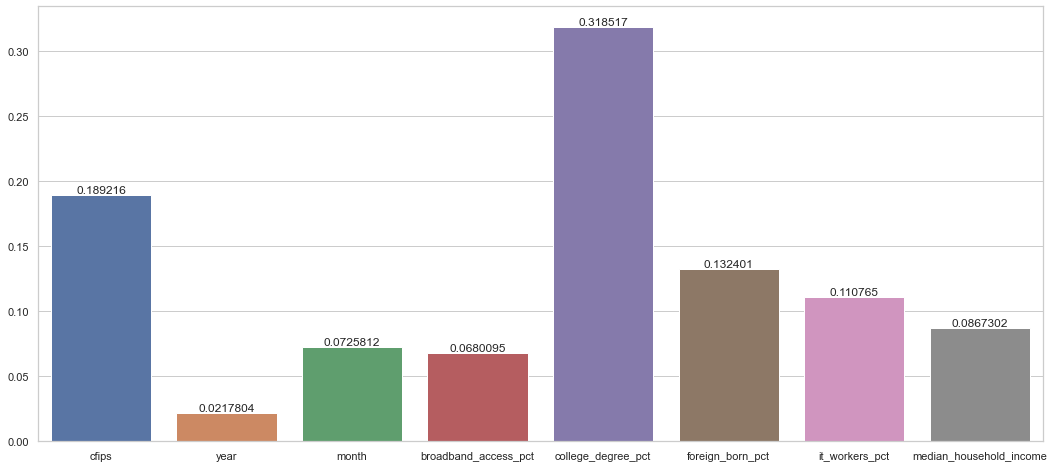

In [70]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(18, 8))
fig = sns.barplot(x=raw.drop('microbusiness_density', axis=1).columns, y=rf.feature_importances_);
plt.bar_label(fig.containers[0], label_type = 'edge');

# <center><div style="font-family: sans-serif; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">Submission</div></center>

1. Train RandomForestRegressor on raw dataset
2. Data manipulation on test set
3. Generate predictions on test set
4. Create final submission dataframe

### 1. Train RandomForestRegressor on all Data

In [38]:
rf

RandomForestRegressor()

### 2. Data Manipulation on Test Set

In [30]:
test = pd.read_csv('data/test.csv', parse_dates=['first_day_of_month'])
test.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [31]:
# Separate first_day_of_month
test['year'] = test['first_day_of_month'].dt.year
test['month'] = test['first_day_of_month'].dt.month

# Saving row_id for making submission dataframe
test_row_id = test['row_id']

# Remove row_id
test.drop(['row_id', 'first_day_of_month'], axis=1, inplace=True)

In [32]:
test.head()

,cfips,year,month
0,1001,2022,11
1,1003,2022,11
2,1005,2022,11
3,1007,2022,11
4,1009,2022,11


In [33]:
# Adding census-specific columns to train dataset
census_columns = ['broadband_access_pct', 
                  'college_degree_pct', 
                  'foreign_born_pct', 
                  'it_workers_pct', 
                  'median_household_income']
test = test.reindex(columns=test.columns.tolist() + census_columns)

start = time.time()

# Running through all the data rows and imputing census data based on cfip ID and year
for i in range(len(test)):
  cfip = test['cfips'][i]
  year = test['year'][i]
  stats = getStats(cfip, year)
    
  test['broadband_access_pct'].iloc[i] = stats[0]
  test['college_degree_pct'].iloc[i] = stats[1]
  test['foreign_born_pct'].iloc[i] = stats[2]
  test['it_workers_pct'].iloc[i] = stats[3]
  test['median_household_income'].iloc[i] = stats[4]
  
  if (i % 10000 == 0):
    end = time.time()
    print(f'#{i} row processed in {(end - start):.2f} seconds')
    start = time.time()
    
print('Processing Completed!')

c:\Users\Mohit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#0 row processed in 0.01 seconds
#10000 row processed in 16.40 seconds
#20000 row processed in 15.02 seconds
Processing Completed!


### 3. Getting Predictions on Test Set

In [34]:
submission_preds = rf.predict(test)

In [35]:
len(submission_preds), len(test_row_id)

(25080, 25080)

### 4. Making Submission DataFrame

In [36]:
submission = pd.DataFrame({'row_id': test_row_id, 
              'microbusiness_density': submission_preds})
submission.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.441745
1,1003_2022-11-01,8.309257
2,1005_2022-11-01,1.223845
3,1007_2022-11-01,1.290789
4,1009_2022-11-01,1.844662


In [37]:
submission.to_csv('data/raw_census_combined_submission.csv', index=False)

# <center><div style="font-family: sans-serif; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;">Kaggle Score: 1.5523</div></center>